In [2]:
print("Lab8")

Lab8


Final x: [1.99952158 1.99952158 1.99952158 1.99952158 1.99952158]
Final function value: 2.2888928390772336e-07


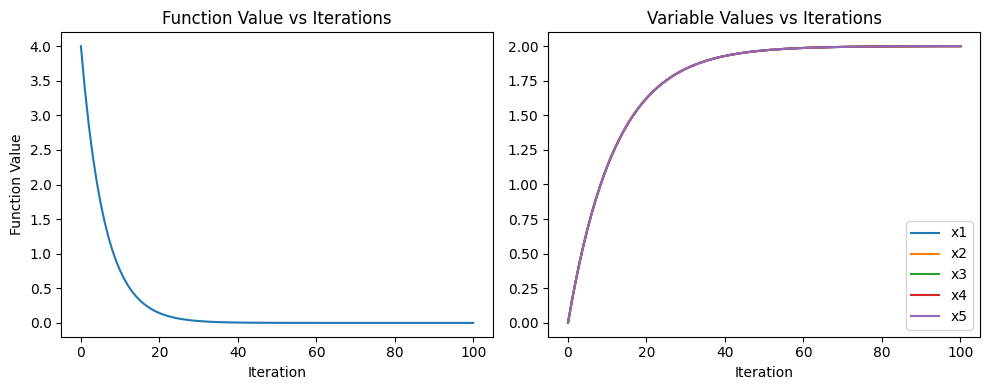

In [10]:
# q3
#  Implement a gradient descent (GD) algorithm in Python to optimize a given objective function. The goal is to minimize the following function:
# f(x) = 1/n sumation (xi- 2)^2 + 0.1 sumation(xi -x(i+1) )^2
# where n is the number of elements in the vector x. The GD algorithm should be implemented using the following steps:
# write the code in python


import numpy as np
import matplotlib.pyplot as plt 

def objective_function(x):
    n = len(x)
    term1 = np.mean((x - 2)**2)
    term2 = 0.1 * sum((x[i] - x[i+1])**2 for i in range(n-1))
    return term1 + term2

def compute_gradient(x):
    n = len(x)
    grad = np.zeros(n)
    
    for i in range(n):
        grad[i] = (2/n) * (x[i] - 2)
        
        if i < n-1:
            grad[i] += 0.2 * (x[i] - x[i+1])
        if i > 0:
            grad[i] += 0.2 * (x[i] - x[i-1])
    
    return grad

def gradient_descent(n=5, learning_rate=0.2, iterations=100):
    x = np.zeros(n)
    
    x_history = [x.copy()]
    f_history = [objective_function(x)]
    
    for _ in range(iterations):
        grad = compute_gradient(x)
        x = x - learning_rate * grad
        
        x_history.append(x.copy())
        f_history.append(objective_function(x))
    
    print(f"Final x: {x}")
    print(f"Final function value: {f_history[-1]}")
    
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(f_history)
    plt.title('Function Value vs Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Function Value')
    
    plt.subplot(1, 2, 2)
    x_history = np.array(x_history)
    for i in range(n):
        plt.plot(x_history[:, i], label=f'x{i+1}')
    plt.title('Variable Values vs Iterations')
    plt.xlabel('Iteration')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

gradient_descent(n=5, learning_rate=0.2, iterations=100)



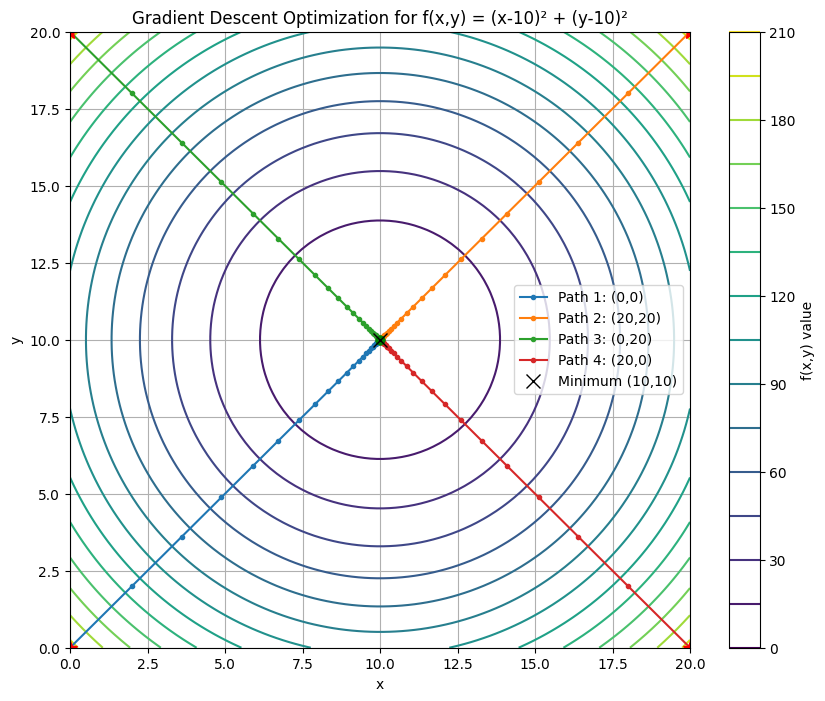

In [7]:
# 4.  Visualize the optimization process of the function f(x,y)=(x−10)^2+(y−10)^2 using a contour plot and mark the path taken by the gradient descent algorithm to reach the minimum.


import numpy as np
import matplotlib.pyplot as plt

def objective_function(x, y):
    return (x - 10)**2 + (y - 10)**2

def gradient(x, y):
    dx = 2 * (x - 10)
    dy = 2 * (y - 10)
    return np.array([dx, dy])

def gradient_descent(start_x, start_y, learning_rate=0.1, iterations=50):
    current_pos = np.array([start_x, start_y])
    path = [current_pos.copy()]
    
    for _ in range(iterations):
        grad = gradient(current_pos[0], current_pos[1])
        current_pos = current_pos - learning_rate * grad
        path.append(current_pos.copy())
    
    return np.array(path)

x = np.linspace(0, 20, 100)
y = np.linspace(0, 20, 100)
X, Y = np.meshgrid(x, y)
Z = objective_function(X, Y)

start_points = [(0, 0), (20, 20), (0, 20), (20, 0)]
paths = []
for start_x, start_y in start_points:
    path = gradient_descent(start_x, start_y, learning_rate=0.1)
    paths.append(path)

plt.figure(figsize=(10, 8))

contour = plt.contour(X, Y, Z, levels=15, cmap='viridis')
plt.colorbar(contour, label='f(x,y) value')

for i, path in enumerate(paths):
    plt.plot(path[:, 0], path[:, 1], 'o-', markersize=3, 
             label=f'Path {i+1}: ({start_points[i][0]},{start_points[i][1]})')
    plt.plot(path[0, 0], path[0, 1], 'r*', markersize=10)
    plt.plot(path[-1, 0], path[-1, 1], 'go', markersize=6)

plt.plot(10, 10, 'kx', markersize=10, label='Minimum (10,10)')

plt.title('Gradient Descent Optimization for f(x,y) = (x-10)² + (y-10)²')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Optimal alpha: 10.7331
Minimum point along the direction: (4.8000, 9.6000)
Minimum function value: 12.8000


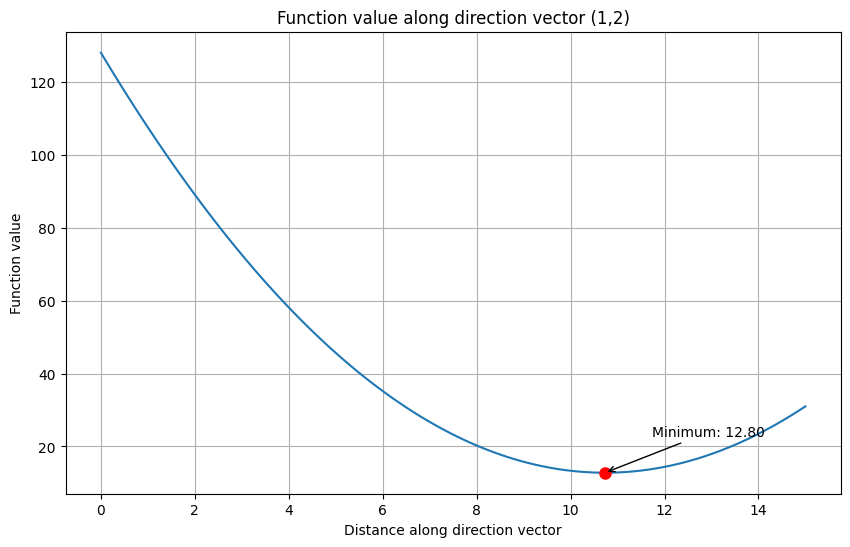

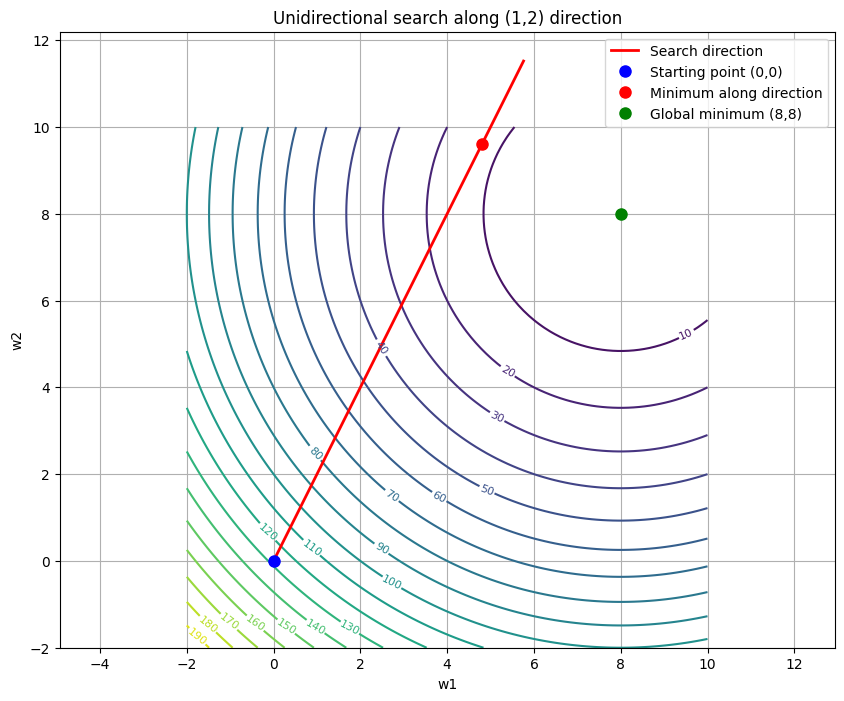

In [ ]:
#2 For the function f(w1,w2) = (w1-8)^2+ (w2-8)^2. Perform a unidirectional search along the direction vector (1,2) starting from the point (0,0) to find the minimum value of f.
import numpy as np
import matplotlib.pyplot as plt

def f(w1, w2):
    return (w1 - 8)**2 + (w2 - 8)**2

start_point = np.array([0, 0])
direction = np.array([1, 2])
direction = direction / np.linalg.norm(direction)

def f_along_direction(alpha):
    point = start_point + alpha * direction
    return f(point[0], point[1])

alphas = np.linspace(0, 15, 100)
function_values = [f_along_direction(alpha) for alpha in alphas]

plt.figure(figsize=(10, 6))
plt.plot(alphas, function_values)
plt.grid(True)
plt.xlabel('Distance along direction vector')
plt.ylabel('Function value')
plt.title('Function value along direction vector (1,2)')

target = np.array([8, 8])
optimal_alpha = np.dot(target - start_point, direction)

optimal_point = start_point + optimal_alpha * direction
min_value = f(optimal_point[0], optimal_point[1])

print(f"Optimal alpha: {optimal_alpha:.4f}")
print(f"Minimum point along the direction: ({optimal_point[0]:.4f}, {optimal_point[1]:.4f})")
print(f"Minimum function value: {min_value:.4f}")

plt.plot(optimal_alpha, min_value, 'ro', markersize=8)
plt.annotate(f'Minimum: {min_value:.2f}', 
             xy=(optimal_alpha, min_value),
             xytext=(optimal_alpha+1, min_value+10),
             arrowprops=dict(arrowstyle='->'))

plt.show()

w1 = np.linspace(-2, 10, 100)
w2 = np.linspace(-2, 10, 100)
W1, W2 = np.meshgrid(w1, w2)
Z = f(W1, W2)

plt.figure(figsize=(10, 8))
contour = plt.contour(W1, W2, Z, levels=20)
plt.clabel(contour, inline=True, fontsize=8)

line_points = np.array([start_point + t * direction for t in np.linspace(0, optimal_alpha*1.2, 100)])
plt.plot(line_points[:, 0], line_points[:, 1], 'r-', linewidth=2, label='Search direction')

plt.plot(start_point[0], start_point[1], 'bo', markersize=8, label='Starting point (0,0)')
plt.plot(optimal_point[0], optimal_point[1], 'ro', markersize=8, label='Minimum along direction')
plt.plot(8, 8, 'go', markersize=8, label='Global minimum (8,8)')

plt.grid(True)
plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Unidirectional search along (1,2) direction')
plt.legend()
plt.axis('equal')
plt.show()

In [11]:
# 1 . For the function J(w) = w^2 + (54/w), implement the following methods: (a) Use the .bracketed value (that you got in the last lab) to get to the critical point employing interval halving method and (b) identify the critical point using Newton-Raphson method and (c) verify the result manually using the optimality criteria (post this write-up as well in .jpg/.png etc).
# (a) Interval Halving Method
def J(w):
    return w**2 + (54/w)

def bracketing(a, b, n):
    for i in range(n):
        c = (a + b) / 2
        if J(c) == 0:
            return c
        elif J(a) * J(c) < 0:
            b = c
        else:
            a = c
    return c

a = 1
b = 10
n = 100
result = bracketing(a, b, n)
print(result)
print(J(result))
# (b) Newton-Raphson Method
def J_prime(w):
    return 2*w - (54/(w**2))
def J_double_prime(w):
    return 2 + (108/(w**3))
def newton_raphson(w0, tol=1e-5, max_iter=100):
    w = w0
    for _ in range(max_iter):
        w_new = w - J_prime(w) / J_double_prime(w)
        if abs(w_new - w) < tol:
            return w_new
        w = w_new
    return None
w0 = 5
result = newton_raphson(w0)
print(result)
print(J(result))


10.0
105.4
3.0
27.0
